In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
df_tree = df.drop('diagnosis', axis = 1)
target = df.diagnosis

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_tree, target, test_size=0.2, random_state = 123)

In [6]:
dtcl = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 123)
dtcl.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

In [7]:
y_pred = dtcl.predict(X_test)
pd.crosstab(y_test, y_pred, rownames = ['classe réelle'], colnames = ['classe prédite'])

classe prédite,B,M
classe réelle,,
B,72,1
M,2,39


In [8]:
fts = {}
for feature, importance in zip(df_tree.columns, dtcl.feature_importances_):
    fts[feature] = importance

importances = pd.DataFrame.from_dict(fts, orient = 'index').rename(columns={0 : 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(7)

,Importance
radius_worst,0.620770
concave points_worst,0.177674
concavity_mean,0.060736
texture_mean,0.051408
texture_worst,0.041369
perimeter_se,0.020865
area_worst,0.016107


In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

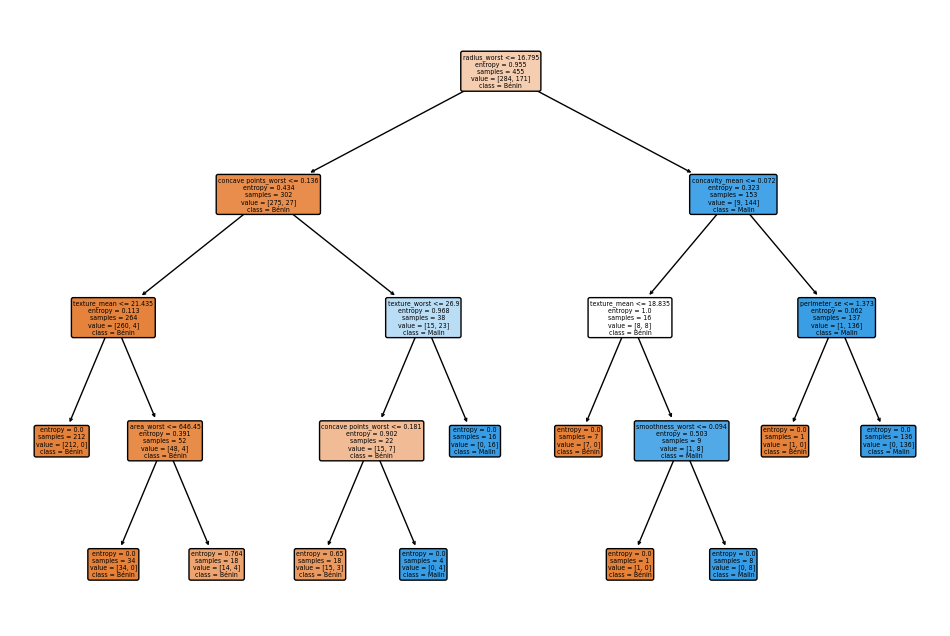

In [10]:
plt.figure(figsize=(12, 8))
plot_tree(dtcl, filled=True, feature_names=df_tree.columns.tolist(), class_names=['Bénin', 'Malin'], rounded=True)

plt.show()

In [11]:
from sklearn.metrics import accuracy_score
y_pred = dtcl.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97
